In [ ]:
# download file zip
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip # disimpan dengan nama file ini

--2021-07-06 06:38:20--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  17.3MB/s    in 14s     

2021-07-06 06:38:35 (22.1 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# unzip file yang sudah didownload
import os
import zipfile
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# cek isi filenya
os.listdir('/tmp/rockpaperscissors/')

['paper', 'rps-cv-images', 'scissors', 'rock', 'README_rpc-cv-images.txt']

In [ ]:
# masuk ke direktori rps-cv-images
os.chdir('/tmp/rockpaperscissors/rps-cv-images')
os.listdir()

['paper', 'scissors', 'rock', 'README_rpc-cv-images.txt']

>**Pembahasan:** <br>
Pada folder `rps-cv-images` memiliki folder dan isi yang sama dengan folder terluarnya. Sehingga kita dapat menggunakan salah satu dari keduanya. Disini saya memilih menggunakan data pada folder `rps-cv-images` tersebut.

In [ ]:
# hapus file readme
os.remove('README_rpc-cv-images.txt')
os.listdir()

['paper', 'scissors', 'rock']

In [ ]:
# melakukan augmentasi gambar
from tensorflow.keras.preprocessing.image import ImageDataGenerator
  
train_dir = os.path.join('/tmp/rockpaperscissors/rps-cv-images')
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip = True,
    vertical_flip = True,
    validation_split=0.4) # sesuai kriteria yang diminta (40%)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training') # atur sebagai data training

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # atur sebagai data validation

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


>**Pembahasan:** <br>
Karena telah ditentukan parameter `validation_split` pada `ImageDataGenerator` maka kita perlu menentukan subset-nya yaitu data yang mana merupakan training dan validation (40%).

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation= 'relu', input_shape = (150,150,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512,activation= 'relu'),
    tf.keras.layers.Dense(3, activation= 'softmax')  # hasil lebih dari 2 kelas
])

In [ ]:
# buat kelas dan kondisi callback untuk memberhentikan pelatihan
class cb(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > .96):
      print("\nAkurasi model berhasil mencapai 96%")
      self.model.stop_training = True
callbacks = cb()

In [ ]:
from keras.optimizers import SGD
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy', # karena ada 3 kelas
              metrics = ['accuracy'])

In [ ]:
# latih model
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    validation_steps=20,
                    epochs=40,
                    steps_per_epoch=40,
                    callbacks = [callbacks])

Epoch 1/40
40/40 [==============================] - 73s 2s/step - loss: 1.0089 - accuracy: 0.4776 - val_loss: 0.7924 - val_accuracy: 0.6578
Epoch 2/40
40/40 [==============================] - 72s 2s/step - loss: 0.8066 - accuracy: 0.6472 - val_loss: 0.8841 - val_accuracy: 0.6219
Epoch 3/40
40/40 [==============================] - 71s 2s/step - loss: 0.7199 - accuracy: 0.7136 - val_loss: 0.5962 - val_accuracy: 0.7797
Epoch 4/40
40/40 [==============================] - 71s 2s/step - loss: 0.8679 - accuracy: 0.6592 - val_loss: 0.4602 - val_accuracy: 0.8188
Epoch 5/40
40/40 [==============================] - 71s 2s/step - loss: 0.5085 - accuracy: 0.8072 - val_loss: 0.3671 - val_accuracy: 0.8844
Epoch 6/40
40/40 [==============================] - 72s 2s/step - loss: 0.3412 - accuracy: 0.8744 - val_loss: 0.3330 - val_accuracy: 0.8875
Epoch 7/40
40/40 [==============================] - 70s 2s/step - loss: 0.3020 - accuracy: 0.8904 - val_loss: 0.3615 - val_accuracy: 0.8578
Epoch 8/40
40/40 [==

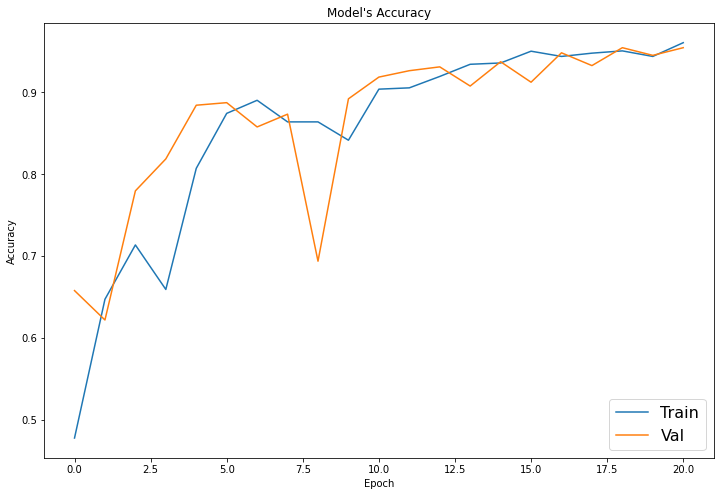

In [ ]:
# visualisasi dari akurasi pelatihan
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model\'s Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right', prop={"size":16})
plt.show()

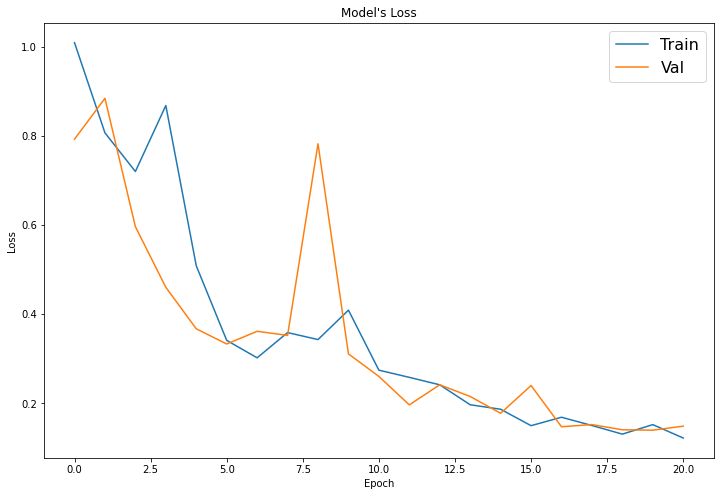

In [ ]:
# visualisasi dari loss
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model\'s Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right', prop={"size":16})
plt.show()

Saving WhatsApp Image 2021-07-05 at 1.11.30 PM.jpeg to WhatsApp Image 2021-07-05 at 1.11.30 PM.jpeg
Gambar yang terdeteksi: kertas


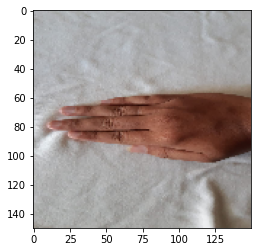

In [ ]:
from google.colab import files
from keras.preprocessing import image
import numpy as np

%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print('Gambar yang terdeteksi: ', end='')
  if classes[0,0] == 1:
    print('kertas')
  elif classes[0,1] == 1:
    print('batu')
  else:
    print('gunting')